In [517]:
#Regression Tree and Random Forest

In [518]:
#install.packages('tree')

In [519]:
library(tree)

In [520]:
rm(list=ls())

In [521]:
uscrime <- read.table('uscrime.txt', stringsAsFactors=FALSE, header=TRUE)

In [522]:
#Use the standard tree function

In [523]:
uscrime_tree <- tree(Crime~., data=uscrime)

In [524]:
#additional splitting method using Gini .. see later that there were unexpected results


In [525]:
uscrime_tree2 <- tree(Crime~., data=uscrime, split = 'gini')  #additional splitting method


In [526]:
cv.tree <- cv.tree(uscrime_tree)

In [527]:
summary(uscrime_tree)


Regression tree:
tree(formula = Crime ~ ., data = uscrime)
Variables actually used in tree construction:
[1] "Po1" "Pop" "LF"  "NW" 
Number of terminal nodes:  7 
Residual mean deviance:  47390 = 1896000 / 40 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-573.900  -98.300   -1.545    0.000  110.600  490.100 

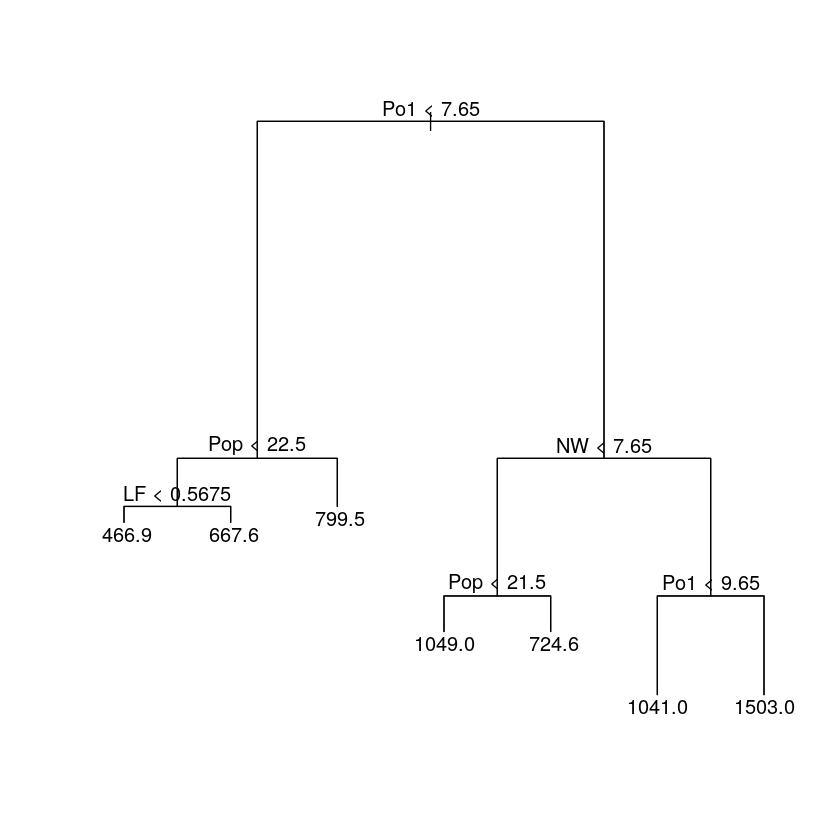

In [528]:
plot(uscrime_tree)
text(uscrime_tree)



In [529]:
print(uscrime_tree$frame)  #add PRINT and error goes away for this request

      var  n        dev      yval splits.cutleft splits.cutright
1     Po1 47 6880927.66  905.0851          <7.65           >7.65
2     Pop 23  779243.48  669.6087          <22.5           >22.5
4      LF 12  243811.00  550.5000        <0.5675         >0.5675
8  <leaf>  7   48518.86  466.8571                               
9  <leaf>  5   77757.20  667.6000                               
5  <leaf> 11  179470.73  799.5455                               
3      NW 24 3604162.50 1130.7500          <7.65           >7.65
6     Pop 10  557574.90  886.9000          <21.5           >21.5
12 <leaf>  5  146390.80 1049.2000                               
13 <leaf>  5  147771.20  724.6000                               
7     Po1 14 2027224.93 1304.9286          <9.65           >9.65
14 <leaf>  6  170828.00 1041.0000                               
15 <leaf>  8 1124984.88 1502.8750                               


In [530]:
summary(uscrime_tree2) #investigate to see if I should do this


Regression tree:
tree(formula = Crime ~ ., data = uscrime, split = "gini")
Variables actually used in tree construction:
character(0)
Number of terminal nodes:  1 
Residual mean deviance:  149600 = 6881000 / 46 
Distribution of residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-563.10 -246.60  -74.09    0.00  152.40 1088.00 

In [531]:
#These are the unexpected results. Is there another parameter to tweak with gini ?

In [532]:
#plot(uscrime_tree2)
#text(uscrime_tree2)

In [533]:
prune.tree(uscrime_tree)$size

[1] 7 6 5 4 3 2 1

In [534]:
#Deviance of tree with cv. Can see deviance on pruned tree without cv is much higher, probably overfitted

In [535]:
cv.tree$dev

[1] 6469517 6493318 6573022 6772328 6935522 7162138 7380292

In [536]:
#Deviance of pruned tree

In [537]:
prune.tree(uscrime_tree)$dev

[1] 1895722 2013257 2276670 2632631 3364043 4383406 6880928

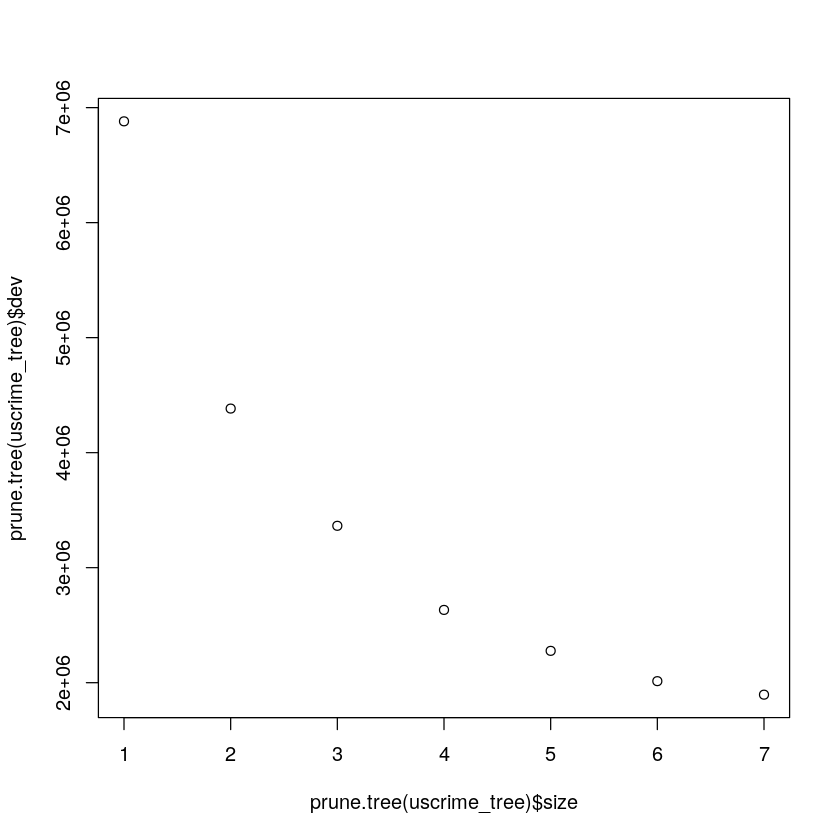

In [538]:
plot(prune.tree(uscrime_tree)$size, prune.tree(uscrime_tree)$dev)

In [539]:
set.seed(42)


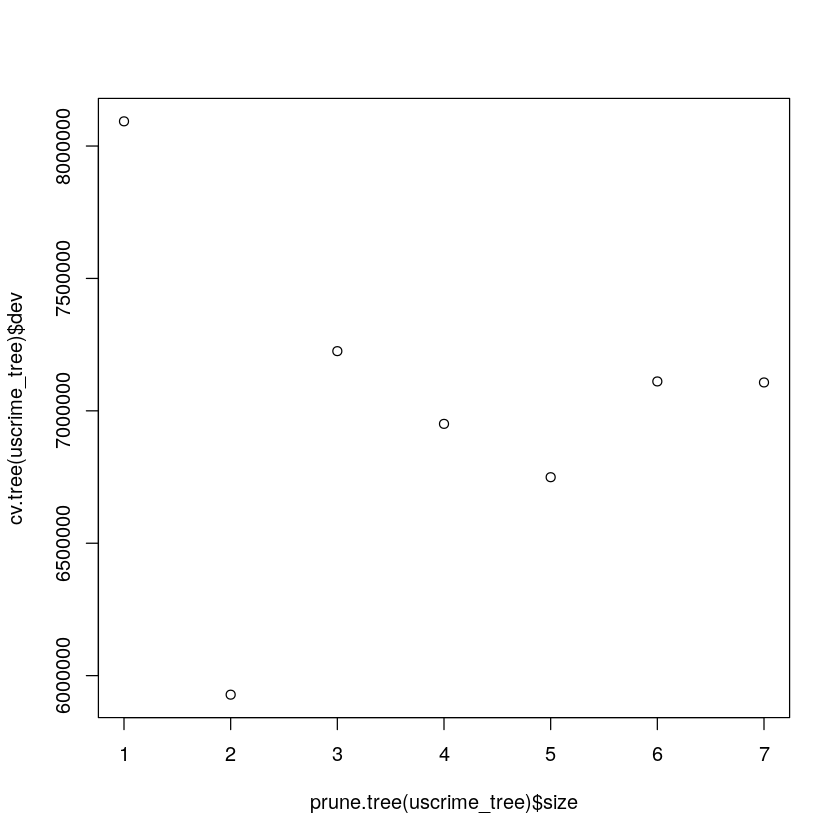

In [540]:
plot(prune.tree(uscrime_tree)$size, cv.tree(uscrime_tree)$dev)

In [541]:
#Above plot shows random plot each time executed, probably better to choose other than cv

In [542]:
#Example of manually pruning tree where we choose to have 4 leaves

In [543]:
uscrime_tree_prune <- prune.tree(uscrime_tree,best=4,)

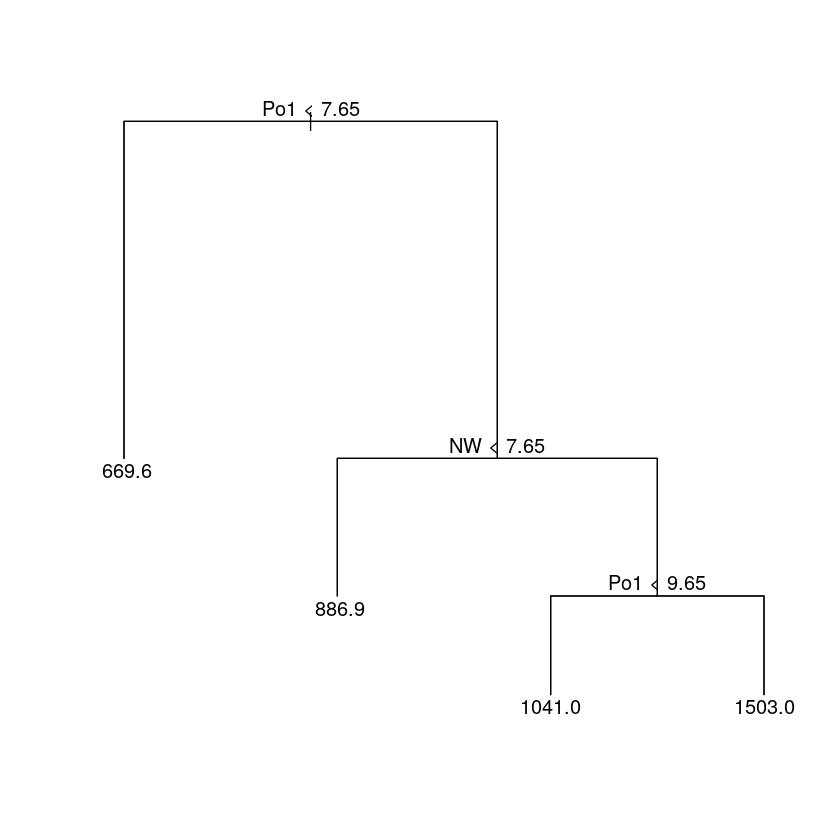

In [544]:
plot(uscrime_tree_prune)
text(uscrime_tree_prune)

In [545]:
#Compute R^2

In [546]:
yhat <- predict(uscrime_tree)
y <- uscrime$Crime
#yhat

In [547]:
compute_rsquared <- function(yhat, y){
    
    SSR <- sum((yhat - y)^2)
    SST <- sum(  (y-mean(y))^2 )
    rsquared <- 1-(SSR/SST)
    return (rsquared)
    
}

In [548]:
rSquared <- compute_rsquared(yhat, y)

In [549]:
#Print rquared value after calculation

In [550]:
# 72% r squared is very good, higher than the highest, 68%, we got last week

In [551]:
rSquared

[1] 0.7244962

In [552]:
#Get data to run regression on left leaf

In [553]:
Po1less7.65 <- uscrime[uscrime$Po1<7.65,]

In [554]:
#head(Po1less7.65)

In [555]:
#Run regression on left leaf

In [556]:
Po1less7.65_lm <- lm(Crime~.,data=Po1less7.65)

In [557]:
summary(Po1less7.65_lm)


Call:
lm(formula = Crime ~ ., data = Po1less7.65)

Residuals:
     Min       1Q   Median       3Q      Max 
-109.147  -52.803   -6.495   53.784  127.196 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)   -48.5477  2044.9766  -0.024   0.9817  
M              45.8622    58.6256   0.782   0.4597  
So            380.4815   223.1072   1.705   0.1319  
Ed            187.9074    89.5799   2.098   0.0741 .
Po1            -3.5138   157.7513  -0.022   0.9829  
Po2            44.6382   148.5528   0.300   0.7725  
LF           1059.3652  1187.9722   0.892   0.4021  
M.F           -22.5521    21.4677  -1.051   0.3284  
Pop            10.6413     5.0929   2.089   0.0750 .
NW              0.1010     7.9019   0.013   0.9902  
U1           4878.2802  4874.8165   1.001   0.3503  
U2             -5.5126   133.5094  -0.041   0.9682  
Wealth         -0.1022     0.1752  -0.583   0.5779  
Ineq            4.7779    35.5290   0.134   0.8968  
Prob        -7317.4407  3280.7511  

In [558]:
# 82% / 62% is very good, due to a good split on Po1

In [559]:
#Get data to run regressin on leaf 2

In [560]:
leaf2_data <- uscrime[uscrime$Po1>7.65 & uscrime$NW<7.65,]
#print(leaf2_data)
#leaf2_lm <- lm(Crime~.,data=leaf2_data)
#summary(leaf2_lm)

In [561]:
 leaf2_lm<- lm(Crime~.,data=leaf2_data)

In [562]:
#summary(leaf2_lm)   Summary shows that not enough data points and too many variables cause problems

In [563]:
#Since some leaves have so few data points, R is not able to effectively run a linear regression on them. The node 
#mentioned in office hours was the best candidate to run regression on.

In [564]:
  #Use rpart to do a regression tree

In [565]:
#Install rpart to do the tree with a different package

In [566]:
#install.packages('rpart')

In [567]:
library(rpart)

In [568]:
#Execute tree with rpart

In [569]:
tree.rpart <- rpart(Crime~., data = uscrime)

In [570]:
#Print summart for decision tree with rpart

In [571]:
summary(tree.rpart)

Call:
rpart(formula = Crime ~ ., data = uscrime)
  n= 47 

          CP nsplit rel error    xerror      xstd
1 0.36296293      0 1.0000000 1.0835673 0.2769478
2 0.14814320      1 0.6370371 1.0540061 0.2784686
3 0.05173165      2 0.4888939 0.9220047 0.2140897
4 0.01000000      3 0.4371622 0.9803354 0.2494661

Variable importance
   Po1    Po2 Wealth   Ineq   Prob      M     NW    Pop   Time     Ed     LF 
    17     17     11     11     10     10      9      5      4      4      1 
    So 
     1 

Node number 1: 47 observations,    complexity param=0.3629629
  mean=905.0851, MSE=146402.7 
  left son=2 (23 obs) right son=3 (24 obs)
  Primary splits:
      Po1    < 7.65      to the left,  improve=0.3629629, (0 missing)
      Po2    < 7.2       to the left,  improve=0.3629629, (0 missing)
      Prob   < 0.0418485 to the right, improve=0.3217700, (0 missing)
      NW     < 7.65      to the left,  improve=0.2356621, (0 missing)
      Wealth < 6240      to the left,  improve=0.2002403, (0 mi

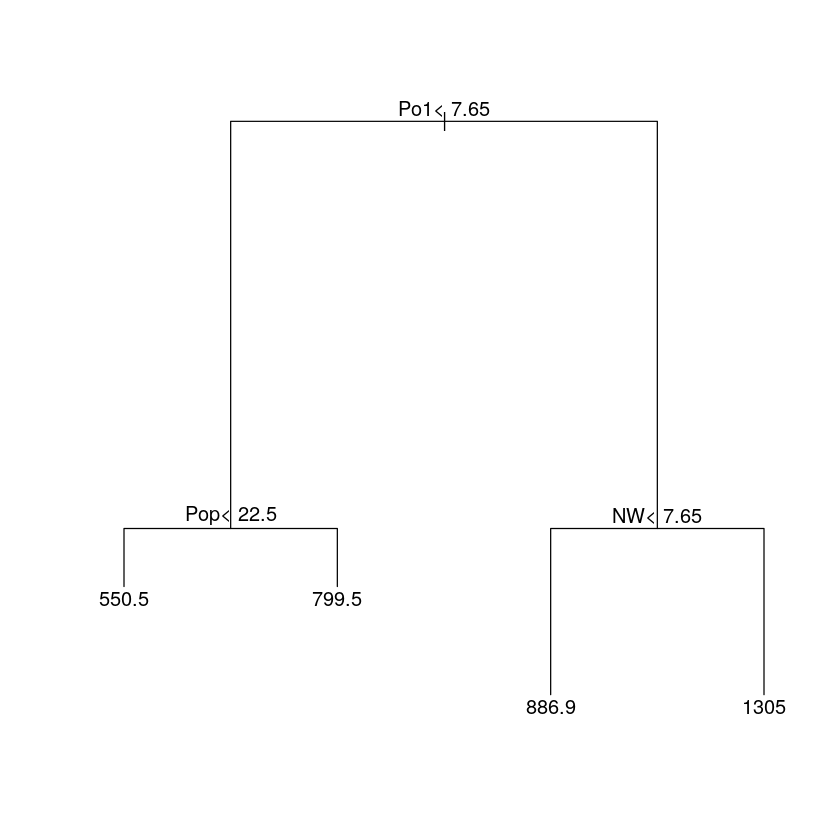

In [572]:
#Plot tree
plot(tree.rpart)
text(tree.rpart)

In [573]:
rpart_reg_data <- uscrime[uscrime$Po1<7.65 & uscrime$Pop<22.5,]

In [574]:
rpart_leaf1_lm <- lm(Crime~.,data = rpart_reg_data)

In [575]:
#summary(rpart_leaf1_lm)  Once again, there are too few data points to run a regression on the leaf

In [576]:
#Consider looking at different numbers of branches and/or different splitting criteria ie. 'split' argument  (ex cred)

In [577]:
#Can use rpart very similarily

In [578]:
#Give two qualitative takeaways ...
#ie.. expenditure on police force ...  >7.65..correlates with higher crime values .. correlation.. reverse causation 
#More insights in write-up

In [579]:
# BEGIN RANDOM FOREST

In [580]:
rm(list=ls())

In [581]:
uscrime <- read.table('uscrime.txt', stringsAsFactors=FALSE, header=TRUE)

In [582]:
#install.packages('randomForest')

In [583]:
library(randomForest)

In [584]:
set.seed(42)

In [585]:
num_pred <- 4

In [586]:
uscrime_rf <- randomForest(Crime~., data = uscrime,
                          mtry = num_pred,
                          importance = TRUE,
                          ntree = 500)

In [587]:
uscrime_rf


Call:
 randomForest(formula = Crime ~ ., data = uscrime, mtry = num_pred,      importance = TRUE, ntree = 500) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 4

          Mean of squared residuals: 83636.77
                    % Var explained: 42.87

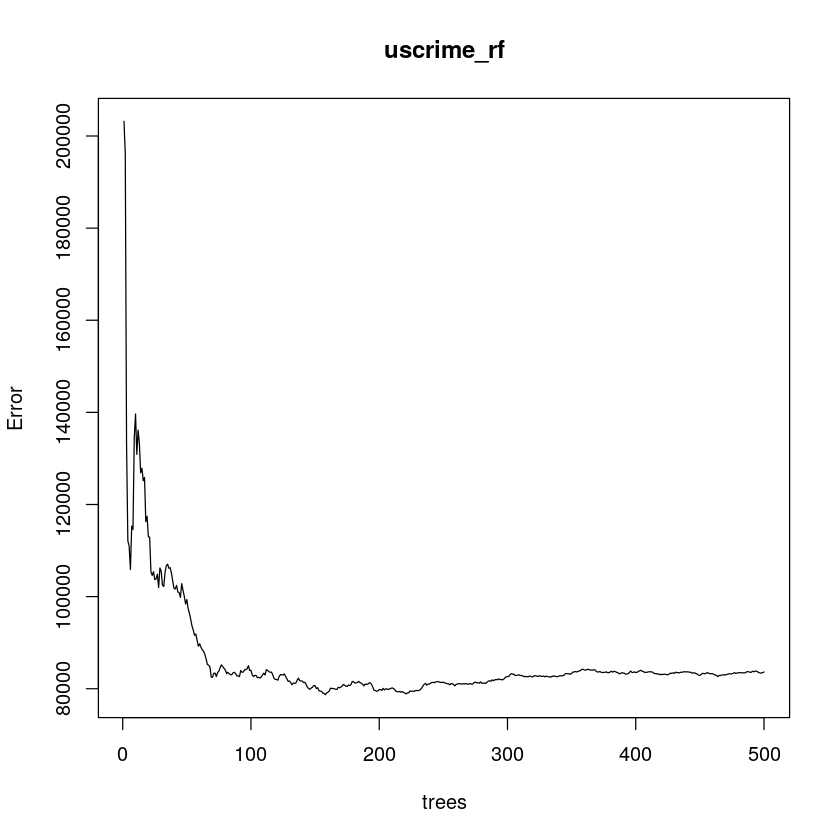

In [588]:
plot(uscrime_rf)

In [589]:
#Because of the way random forests are calculated, it already takes an average of different models which is just 
#another way of doing a cross validation to arrive at a conclusion. Cross-validation might be done in choosing number
#of predictors

In [590]:
importance(uscrime_rf)

,%IncMSE,IncNodePurity
M,2.4984854,200566.40
So,1.3802135,33881.59
Ed,4.8378328,198601.72
Po1,9.7354718,1076933.25
Po2,10.6715396,1268930.03
LF,0.6449124,311872.13
M.F,1.1555044,239897.22
Pop,2.1893155,379760.15
NW,8.7310286,542658.76
U1,2.6422460,145760.60


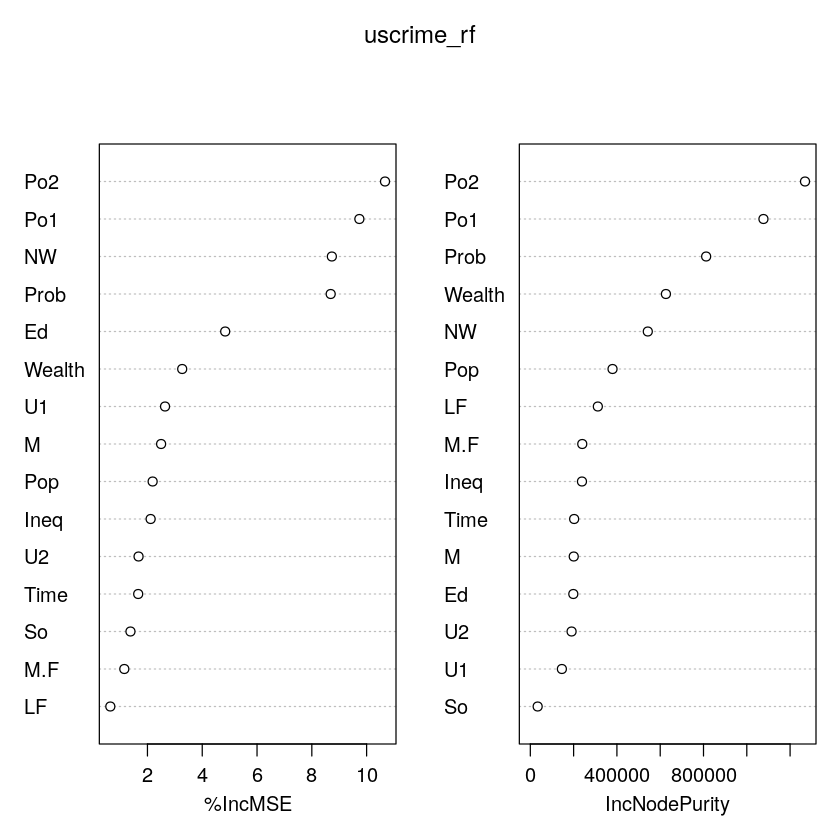

In [591]:
varImpPlot(uscrime_rf)

In [592]:
#Explain model via importance of variables from importance  ... black box model

In [593]:
#BEGIN LOGISTIC REGRESSION

In [594]:
rm(list=ls())

In [595]:
germancredit <- read.table('germancredit.txt', sep="", header=FALSE)

In [596]:
head(germancredit)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21
A11,6,A34,A43,1169,A65,A75,4,A93,A101,⋯,A121,67,A143,A152,2,A173,1,A192,A201,1
A12,48,A32,A43,5951,A61,A73,2,A92,A101,⋯,A121,22,A143,A152,1,A173,1,A191,A201,2
A14,12,A34,A46,2096,A61,A74,2,A93,A101,⋯,A121,49,A143,A152,1,A172,2,A191,A201,1
A11,42,A32,A42,7882,A61,A74,2,A93,A103,⋯,A122,45,A143,A153,1,A173,2,A191,A201,1
A11,24,A33,A40,4870,A61,A73,3,A93,A101,⋯,A124,53,A143,A153,2,A173,2,A191,A201,2
A14,36,A32,A46,9055,A65,A73,2,A93,A101,⋯,A124,35,A143,A153,1,A172,2,A192,A201,1


In [597]:
germancredit$V21[germancredit$V21 == 2] <- 0

In [598]:
##########
#  0 = Bad, 
#  1 = Good
##########

In [599]:
head(germancredit)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21
A11,6,A34,A43,1169,A65,A75,4,A93,A101,⋯,A121,67,A143,A152,2,A173,1,A192,A201,1
A12,48,A32,A43,5951,A61,A73,2,A92,A101,⋯,A121,22,A143,A152,1,A173,1,A191,A201,0
A14,12,A34,A46,2096,A61,A74,2,A93,A101,⋯,A121,49,A143,A152,1,A172,2,A191,A201,1
A11,42,A32,A42,7882,A61,A74,2,A93,A103,⋯,A122,45,A143,A153,1,A173,2,A191,A201,1
A11,24,A33,A40,4870,A61,A73,3,A93,A101,⋯,A124,53,A143,A153,2,A173,2,A191,A201,0
A14,36,A32,A46,9055,A65,A73,2,A93,A101,⋯,A124,35,A143,A153,1,A172,2,A192,A201,1


In [600]:

nr <- nrow(germancredit)

train_samples <- sample(1:nr, size = round(nr*.8), replace = FALSE)
germcred_train <- germancredit[train_samples,]
germcred_test <- germancredit[-train_samples,]



#germcred_train <- germancredit[1:800,]
#germcred_test <- germancredit[801:1000,]

In [601]:
germancredit_lm <- glm(V21~.,data = germcred_train, family = binomial(link='logit'))

In [602]:
summary(germancredit_lm)


Call:
glm(formula = V21 ~ ., family = binomial(link = "logit"), data = germcred_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6558  -0.6647   0.3457   0.6508   2.3275  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.105e+00  1.406e+00   0.786 0.431819    
V1A12        2.859e-01  2.482e-01   1.152 0.249508    
V1A13        9.894e-01  4.376e-01   2.261 0.023742 *  
V1A14        1.726e+00  2.678e-01   6.444 1.16e-10 ***
V2          -2.930e-02  1.079e-02  -2.715 0.006632 ** 
V3A31       -7.743e-01  6.373e-01  -1.215 0.224386    
V3A32        1.546e-01  4.980e-01   0.310 0.756187    
V3A33        4.161e-01  5.431e-01   0.766 0.443522    
V3A34        1.068e+00  5.079e-01   2.103 0.035436 *  
V4A41        1.593e+00  4.202e-01   3.790 0.000151 ***
V4A410       1.586e+00  8.343e-01   1.901 0.057282 .  
V4A42        8.290e-01  2.992e-01   2.771 0.005591 ** 
V4A43        9.890e-01  2.879e-01   3.435 0.000592 ***
V4A44        

In [603]:
#Perform variable selection

In [604]:
#Select variables I considered important, even at 90% level

In [605]:
keep <- c('V1' , 'V2' , 'V3' , 'V4' , 'V5' , 'V6' , 'V7' , 'V8' , 'V10', 'V13', 'V14', 'V16' , 'V19', 'V20', 'V21')


In [606]:
germancredit2 <- germancredit[,keep]

In [607]:
#Prepare data for second round of varaible selection

In [608]:
keep2 <- c('V1' , 'V2' , 'V4' , 'V5' , 'V6' , 'V7' , 'V8' , 'V13', 'V14', 'V21')

In [609]:
germancredit3 <- germancredit[,keep2]

In [610]:
#Perform train test split for dataset without insignificant variables

In [611]:
nr <- nrow(germancredit2)

train_samples2 <- sample(1:nr, size = round(nr*.8), replace = FALSE)
germancredit2_train <- germancredit2[train_samples2,]
germancredit2_test <- germancredit2[-train_samples2,]

In [612]:
germancredit2_lm <- glm(V21~.,data = germancredit2_train, family = binomial(link='logit'))

In [613]:
#Lets first optimize using all the variables

In [614]:
yhat <- predict(germancredit_lm, germcred_test, type="response")

In [615]:
#Important to use type = response here because without it, it gives predictions of log-odds in the default case

In [616]:
#install.packages('pROC')

In [617]:
library(pROC)

In [618]:
roc(germcred_test$V21, round(yhat))


Call:
roc.default(response = germcred_test$V21, predictor = round(yhat))

Data: round(yhat) in 60 controls (germcred_test$V21 0) < 140 cases (germcred_test$V21 1).
Area under the curve: 0.6667

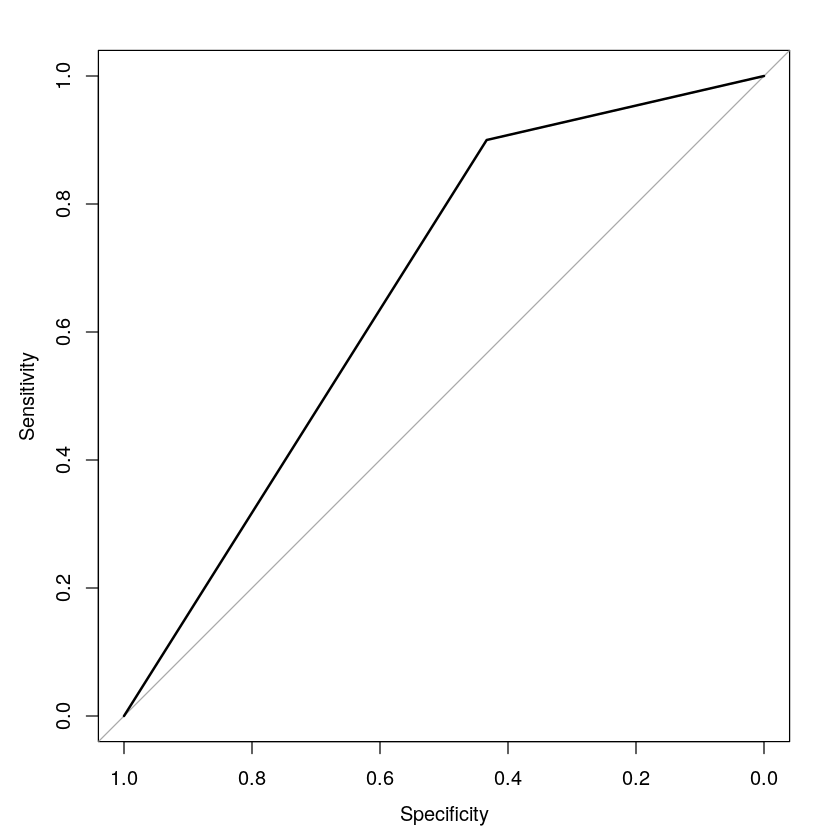

In [619]:
plot(roc(germcred_test$V21, round(yhat)))

In [620]:
#Look at different threshold probability values and then compute the cost that corresponds to each threshold

In [621]:
thresh = .776


In [622]:
#.776 is the threshold where bad custs identified as good = 5x good custs identified as bad  (equal cost)

In [623]:
#Minimizing cost: 

In [624]:
yhat_thresh <- as.integer(yhat > thresh)

In [625]:
conf_matrix <- as.matrix(table(yhat_thresh, germcred_test$V21))

In [626]:
conf_matrix

           
yhat_thresh  0  1
          0 40 49
          1 20 91

In [627]:
#For a train/test split without sample,
# threshold .111 gives 67 as cost when (Bad identified as good + 5*Good identified as bad) 
#For a train/test split using sample, .155 gives the optimized threshold

In [628]:
#Recommend using .155 as threshold, ignoring variable selection (we'll do that soon). Total cost does not go below 
#the value for this threshold.

In [629]:
#Set best for minimize function

In [630]:
best = 10000000

In [631]:
#Make loop to display easy to read printout of confusion matrix, min no. for cost, threshold, and cost at that 
#threshold

In [632]:


for (i in seq(from=.100, to=1.00, by=.001)){

thresh <- i

yhat_thresh <- as.integer(yhat > thresh)
conf_matrix2 <- as.matrix(table(yhat_thresh, germcred_test$V21))

print(conf_matrix2)
num1 <- conf_matrix2[2,1]

num2 <- conf_matrix2[1,2]

best = min(best,((num1 + 5*num2)))
    
print(paste(best,i,num1+5*num2))
  
}

           
yhat_thresh   0   1
          0   2   1
          1  58 139
[1] "63 0.1 63"
           
yhat_thresh   0   1
          0   2   1
          1  58 139
[1] "63 0.101 63"
           
yhat_thresh   0   1
          0   2   1
          1  58 139
[1] "63 0.102 63"
           
yhat_thresh   0   1
          0   2   1
          1  58 139
[1] "63 0.103 63"
           
yhat_thresh   0   1
          0   2   1
          1  58 139
[1] "63 0.104 63"
           
yhat_thresh   0   1
          0   2   1
          1  58 139
[1] "63 0.105 63"
           
yhat_thresh   0   1
          0   2   1
          1  58 139
[1] "63 0.106 63"
           
yhat_thresh   0   1
          0   2   1
          1  58 139
[1] "63 0.107 63"
           
yhat_thresh   0   1
          0   2   1
          1  58 139
[1] "63 0.108 63"
           
yhat_thresh   0   1
          0   2   1
          1  58 139
[1] "63 0.109 63"
           
yhat_thresh   0   1
          0   2   1
          1  58 139
[1] "63 0.11 63"
           
y

ERROR: Error in `[.default`(conf_matrix2, 2, 1): subscript out of bounds


In [633]:
#Let's optimize after variable selection

In [634]:
yhat <- predict(germancredit2_lm, germancredit2_test, type="response")

In [635]:
summary(germancredit2_lm)


Call:
glm(formula = V21 ~ ., family = binomial(link = "logit"), data = germancredit2_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6134  -0.7482   0.3752   0.7246   2.1889  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -8.871e-01  9.068e-01  -0.978 0.327898    
V1A12        5.726e-01  2.413e-01   2.373 0.017648 *  
V1A13        9.972e-01  4.082e-01   2.443 0.014563 *  
V1A14        1.712e+00  2.540e-01   6.740 1.58e-11 ***
V2          -3.361e-02  1.028e-02  -3.269 0.001081 ** 
V3A31       -2.175e-01  5.858e-01  -0.371 0.710402    
V3A32        5.382e-01  4.648e-01   1.158 0.246839    
V3A33        8.909e-01  5.086e-01   1.751 0.079861 .  
V3A34        1.481e+00  4.855e-01   3.051 0.002283 ** 
V4A41        1.633e+00  4.148e-01   3.938 8.21e-05 ***
V4A410       1.762e+00  9.424e-01   1.870 0.061514 .  
V4A42        6.867e-01  2.780e-01   2.470 0.013512 *  
V4A43        1.033e+00  2.730e-01   3.785 0.000154 ***
V4A44   

In [636]:
#Reset best for new min function

In [637]:
best = 10000000

In [638]:
for (i in seq(from=.100, to=1.00, by=.001)){

thresh <- i

yhat_thresh <- as.integer(yhat > thresh)
conf_matrix2 <- as.matrix(table(yhat_thresh, germancredit2_test$V21))

print(conf_matrix2)
num1 <- conf_matrix2[2,1]

num2 <- conf_matrix2[1,2]

best = min(best,((num1 + 5*num2)))
    
print(paste(best,i,num1+5*num2))
  
}

           
yhat_thresh   0   1
          0   1   1
          1  52 146
[1] "57 0.1 57"
           
yhat_thresh   0   1
          0   1   1
          1  52 146
[1] "57 0.101 57"
           
yhat_thresh   0   1
          0   1   1
          1  52 146
[1] "57 0.102 57"
           
yhat_thresh   0   1
          0   1   1
          1  52 146
[1] "57 0.103 57"
           
yhat_thresh   0   1
          0   1   1
          1  52 146
[1] "57 0.104 57"
           
yhat_thresh   0   1
          0   1   1
          1  52 146
[1] "57 0.105 57"
           
yhat_thresh   0   1
          0   1   1
          1  52 146
[1] "57 0.106 57"
           
yhat_thresh   0   1
          0   1   1
          1  52 146
[1] "57 0.107 57"
           
yhat_thresh   0   1
          0   1   1
          1  52 146
[1] "57 0.108 57"
           
yhat_thresh   0   1
          0   1   1
          1  52 146
[1] "57 0.109 57"
           
yhat_thresh   0   1
          0   1   1
          1  52 146
[1] "57 0.11 57"
           
y

ERROR: Error in `[.default`(conf_matrix2, 2, 1): subscript out of bounds


In [639]:
#After variable selection, new preferred threshold is between .109 and .115, minimizing cost

In [640]:
#Perform steps again after 2nd round of variable selection

In [641]:
nr <- nrow(germancredit3)

train_samples3 <- sample(1:nr, size = round(nr*.8), replace = FALSE)
germancredit3_train <- germancredit3[train_samples3,]
germancredit3_test <- germancredit3[-train_samples3,]

In [642]:
#Rerun model

In [643]:
germancredit_lm3 <- glm(V21~.,data = germancredit3_train, family = binomial(link='logit'))

In [644]:
summary(germancredit_lm3)


Call:
glm(formula = V21 ~ ., family = binomial(link = "logit"), data = germancredit3_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7584  -0.8273   0.3988   0.7358   2.0663  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -9.788e-02  6.719e-01  -0.146 0.884176    
V1A12        4.253e-01  2.282e-01   1.864 0.062325 .  
V1A13        1.288e+00  4.087e-01   3.151 0.001625 ** 
V1A14        1.943e+00  2.507e-01   7.752 9.02e-15 ***
V2          -3.146e-02  9.501e-03  -3.311 0.000930 ***
V4A41        1.392e+00  3.956e-01   3.518 0.000435 ***
V4A410       2.188e+00  7.805e-01   2.803 0.005061 ** 
V4A42        6.231e-01  2.744e-01   2.271 0.023157 *  
V4A43        9.269e-01  2.650e-01   3.498 0.000469 ***
V4A44        1.843e-03  8.092e-01   0.002 0.998183    
V4A45        2.450e-01  6.246e-01   0.392 0.694867    
V4A46       -5.204e-01  4.303e-01  -1.210 0.226467    
V4A48        1.367e+00  1.155e+00   1.184 0.236472    
V4A49   

In [645]:
#AIC for this model is now 800

In [646]:
yhat <- predict(germancredit_lm3, germancredit3_test, type="response")

In [647]:
best <- 1000000

In [648]:
#run loop to optimize

In [649]:

for (i in seq(from=.100, to=1.00, by=.001)){

threshold <- i

yhat_thresh <- as.integer(yhat > threshold)
conf_matrix3 <- as.matrix(table(yhat_thresh, germcred_test$V21))

print(conf_matrix3)
num1 <- conf_matrix3[2,1]

num2 <- conf_matrix3[1,2]

best = min(best,((num1 + 5*num2)))
    
print(paste(best,i,num1+5*num2))
  
}

           
yhat_thresh   0   1
          0   1   1
          1  59 139
[1] "64 0.1 64"
           
yhat_thresh   0   1
          0   1   1
          1  59 139
[1] "64 0.101 64"
           
yhat_thresh   0   1
          0   1   1
          1  59 139
[1] "64 0.102 64"
           
yhat_thresh   0   1
          0   2   1
          1  58 139
[1] "63 0.103 63"
           
yhat_thresh   0   1
          0   2   1
          1  58 139
[1] "63 0.104 63"
           
yhat_thresh   0   1
          0   2   1
          1  58 139
[1] "63 0.105 63"
           
yhat_thresh   0   1
          0   2   1
          1  58 139
[1] "63 0.106 63"
           
yhat_thresh   0   1
          0   2   1
          1  58 139
[1] "63 0.107 63"
           
yhat_thresh   0   1
          0   2   1
          1  58 139
[1] "63 0.108 63"
           
yhat_thresh   0   1
          0   2   1
          1  58 139
[1] "63 0.109 63"
           
yhat_thresh   0   1
          0   2   1
          1  58 139
[1] "63 0.11 63"
           
y

ERROR: Error in `[.default`(conf_matrix3, 2, 1): subscript out of bounds


In [ ]:
#New threshold after 2nd round of variable selectin: .12 - .182     #Happy analyzing